In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython import display
import os, copy
from PIL import Image

In [3]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)

In [4]:
class NN(nn.Module):
    
    def __init__(self):
        super(NN, self).__init__()
        self.layers = nn.Sequential(nn.Linear(2, 16, bias=True),
                                    nn.Tanh(),
                                    nn.Linear(16, 16, bias=False),
                                    nn.Tanh(),
                                    nn.Linear(16, 16, bias=False),
                                    nn.Tanh(),
                                    nn.Linear(16, 16, bias=False),
                                    nn.Tanh(),
                                    nn.Linear(16, 16, bias=False),
                                    nn.Tanh(),
                                    nn.Linear(16, 16, bias=False),
                                    nn.Tanh(),
                                    nn.Linear(16, 16, bias=False),
                                    nn.Tanh(),
                                    nn.Linear(16, 16, bias=False),
                                    nn.Tanh(),
                                    nn.Linear(16, 16, bias=False),
                                    nn.Tanh(),
                                    nn.Linear(16, 3, bias=False),
                                    nn.Sigmoid())
        
    def forward(self, x):
        return self.layers(x)

In [5]:
def gen_new_image(size, save=True):
    net = NN()
    net.apply(init_normal)
    colors = run_net(net, size)
    plot_colors(colors)
    if(True):
        save_colors(colors)
    return net, colors

In [6]:
def run_net(net, size=128):
    
    x = np.arange(0, size, 1)
    y = np.arange(0, size, 1)
    colors = np.zeros((size, size, 3))
    for i in x:
        for j in y:
            colors[i][j] = net(torch.tensor([float(i)/size-0.5,float(j)/size-0.5]).type(torch.FloatTensor).view(1,-1)).detach().numpy()
    return colors

In [7]:
def plot_colors(colors, fig_size=4):
    plt.figure(figsize=(fig_size,fig_size))
    plt.imshow(colors, interpolation='nearest', vmin=0, vmax=1)

In [8]:
def save_colors(colors):
    plt.imsave(str(np.random.randint(100000))+".png", colors)

In [9]:
def run_plot_save(net, size, fig_size=8):
    colors = run_net(net, size)
    plot_colors(colors, fig_size)
    save_colors(colors)

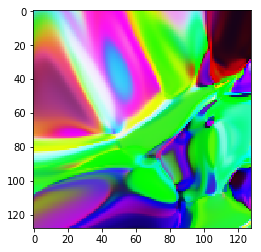

In [10]:
n,c = gen_new_image(128, save=False)

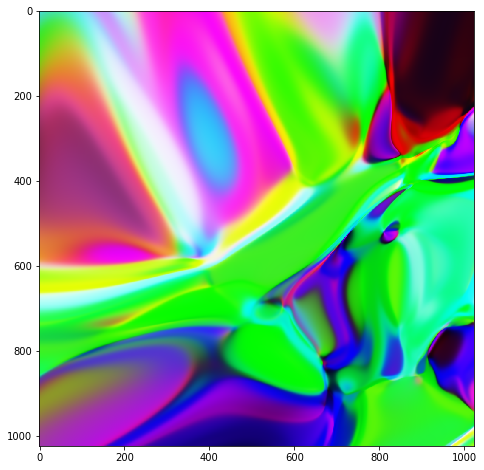

In [11]:
run_plot_save(n,1024,8)